## 线性回归
- https://zh-v2.d2l.ai/chapter_linear-networks/linear-regression-scratch.html

In [14]:
!ls .

sample_data


In [15]:
%matplotlib inline
import random
import tensorflow as tf

In [16]:
! pip install d2l

In [17]:
from d2l import tensorflow as d2l

In [18]:
# 生成数据集
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [19]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([-0.0534416  1.1212648], shape=(2,), dtype=float32) 
label: tf.Tensor([0.2835408], shape=(1,), dtype=float32)


In [27]:
# !pip list

In [28]:
# !pip install numpy

In [39]:
# !pip install matplotlib==3.2.0

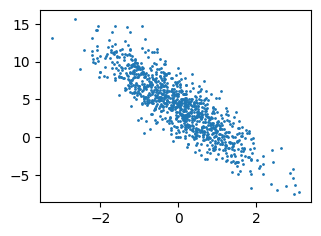

In [46]:
from matplotlib_inline import backend_inline

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

backend_inline.set_matplotlib_formats('png')

In [47]:
# read data
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.57786226 -1.3940872 ]
 [-1.6412425   1.5721027 ]
 [-0.44446686 -2.4230452 ]
 [ 0.30650112  0.5163555 ]
 [-0.23358576  0.38244754]
 [ 1.108073   -1.31059   ]
 [-0.5254026   0.34701976]
 [ 0.9604764   0.8503221 ]
 [ 0.06839553  0.68265635]
 [ 0.71731156  0.22325315]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 7.7815466]
 [-4.429739 ]
 [11.552362 ]
 [ 3.0493405]
 [ 2.438016 ]
 [10.871672 ]
 [ 1.9750113]
 [ 3.2199967]
 [ 2.0208786]
 [ 4.8650327]], shape=(10, 1), dtype=float32)


In [48]:
# 初始化模型参数，将偏置为0
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [52]:
w,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 2.000349 ],
        [-3.3996935]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.1994996], dtype=float32)>)

In [49]:
# 定义线性回归模型
def linreg(X, w, b):
    """线性回归模型"""
    return tf.matmul(X, w) + b

# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

# 定义小批量随机梯度下降算法
def sgd(params, grads, lr, batch_size):
    """小批量随机梯度下降"""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [50]:
# 训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 计算l关于[w,b]的梯度
        dw, db = g.gradient(l, [w, b])
        # 使用参数的梯度更新参数
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.041109
epoch 2, loss 0.000151
epoch 3, loss 0.000047


In [51]:
# 评估
print(f'w的估计误差: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: [-0.00034904 -0.00030661]
b的估计误差: [0.0005002]
